In [40]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 16
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

In [41]:
bands = np.genfromtxt( "./NiO.bands.dat.gnu" )
bands_wann = np.genfromtxt( "./NiO_band.dat" )
Ef = 15.0013
a_lattice = 7.85108879 ##in Bohr
bohr_to_angstrom = 0.529177

In [42]:
bands[:,1] = bands[:,1] - Ef
bands_wann[:,1] = bands_wann[:,1] - Ef

In [43]:
## QE convention: energies are written in eV and xk in units 2\pi/a, with a in Bohr
## Wannier90 convention: energies are written in eV and xk in units of 1/a, with a in Angstrom
rescale = 2*np.pi/(a_lattice*bohr_to_angstrom)

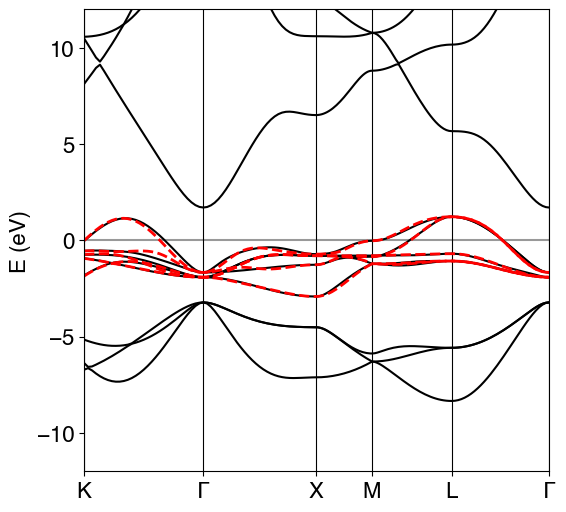

In [44]:
fig, axs = plt.subplots(1,1, sharex=False, sharey=True, figsize=(6,6))
fig.subplots_adjust(hspace=0.125, wspace=0.145)
axs.set_ylabel(r"E (eV)")
axs.set_xlim(0, 4.1338)
axs.set_ylim(-12.0, 12.0)

axs.axhline(0, color="black", alpha=0.40)

lw = 2
num_bands = 32
num_pts = 5*30+1
num_pts_wann = 117
for k in range(num_bands):
    axs.plot(bands_wann[k*num_pts_wann:k*num_pts_wann+num_pts_wann,0]/rescale, bands_wann[k*num_pts_wann:k*num_pts_wann+num_pts_wann,1], 
                linewidth=lw, color="red", linestyle="--")
    if k > 0:
        axs.plot(bands[k*num_pts:k*num_pts+num_pts,0], bands[k*num_pts:k*num_pts+num_pts,1], 
                color="black", zorder=-1)



axs.set_xticks([0.0000, 1.0607, 2.0607, 2.5607, 3.2678, 4.1338])
axs.set_xticklabels(['K', r'$\Gamma$', 'X', 'M', 'L',  r'$\Gamma$'])
axs.grid(which='both', axis='x', color='k')

fig.savefig('NiO_wann.png', transparent=False, dpi=300)

In [45]:
print()